# Towards Smart Cities
#### Name : Dana Almanla

#### Changes: Liubov Tupikina

# Introduction
### Motivation
- This project in focused on green spaces in cities specifically urban trees. There is a great value for urban trees such as they increase urban diversity, decrease pollution as they work as  afilter for urban pollutants. Also, they can help with climat change since every Mature tree can absorb 150 kg of CO2 Per year.
- Additonally, there are many movements and projects for tree planting and watering which also shows the importance of this subject.

### Research Questions
- Which Areas need more trees?
- Can we classify street to green/not green roads? 
- How to decide which tree type to plant (regular people)?
- Can the community contribuate to watering street trees?

### Dataset description:
####  Tree (les arbres) 
- from paris open source website ( http://tiny.cc/xud6tz) it was created on 2001 by the Department of Green Spaces and the Environment – Paris City Hall and it is updated weekly 


In [1]:
#!pip install geopandas

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# removing plotly not to have any issues
#import plotly.graph_objects as go
#import plotly.express as px

import numpy as np
from geopandas.tools import sjoin
from scipy.spatial import cKDTree
from shapely.geometry import Point
from sklearn.neighbors import BallTree
import math



### Data Loading and Analysis

Index: 204347 entries, 0 to 204346

Data columns (total 17 columns), see below.

In [2]:
import os
tree_data = pd.read_csv('data/les-arbres.csv', sep=';')

tree_data.head()

IDBASE TYPE EMPLACEMENT DOMANIALITE     ARRONDISSEMENT COMPLEMENT ADRESSE  \
0   164440            Arbre   CIMETIERE       VAL-DE-MARNE                NaN   
1   271678            Arbre  Alignement     PARIS 7E ARRDT                 21   
2   285513            Arbre  Alignement    PARIS 10E ARRDT                196   
3  2010617            Arbre      Jardin  BOIS DE VINCENNES                NaN   
4  2020034            Arbre      Jardin    PARIS 18E ARRDT                NaN   

   NUMERO                               LIEU / ADRESSE IDEMPLACEMENT  \
0     NaN      CIMETIERE DE THIAIS / AVENUE C / DIV 28  A00800028001   
1     NaN                               AVENUE BOSQUET     000501020   
2     NaN                 RUE DU FAUBOURG SAINT MARTIN     002402017   
3     NaN  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE      00020031   
4     NaN    JARDIN ROSA LUXEMBOURG / 22 BIS RUE PAJOL     000108010   

    LIBELLE FRANCAIS     GENRE                   ESPECE  \
0  Cerisier à fleurs    Prunus                    avium   
1            Platane  Platanus               orientalis   
2            Platane  Platanus              x hispanica   
3              Cèdre    Cedrus  libani subsp. atlantica   
4                Pin     Pinus               sylvestris   

      VARIETE OUCULTIVAR  CIRCONFERENCE (cm)  HAUTEUR (m)  \
0  ''Flore Roseo Pleno''                 175            6   
1                    NaN                  80           12   
2                    NaN                 189           20   
3                    NaN                 120           20   
4                    NaN                  55            7   

  STADE DE DEVELOPPEMENT REMARQUABLE                 geo_point_2d  
0                      A         NON  48.7623229117,2.37188655301  
1                      A         NON  48.8599122673,2.30308583621  
2                      A         NON  48.8791430742,2.36289539665  
3                      A         NON  48.8388629482,2.43885227398  
4                      J         NON  48.8893768123,2.36325229242

In [3]:
# Let us find out how many trees are remarkable?

tree_remark = tree_data[tree_data["REMARQUABLE"] == "OUI" ]
tree_remark.info()
tree_remark.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 571 to 204517
Data columns (total 17 columns):
IDBASE                    179 non-null int64
TYPE EMPLACEMENT          179 non-null object
DOMANIALITE               179 non-null object
ARRONDISSEMENT            179 non-null object
COMPLEMENT ADRESSE        137 non-null object
NUMERO                    0 non-null float64
LIEU / ADRESSE            179 non-null object
IDEMPLACEMENT             179 non-null object
LIBELLE FRANCAIS          179 non-null object
GENRE                     179 non-null object
ESPECE                    179 non-null object
VARIETE OUCULTIVAR        16 non-null object
CIRCONFERENCE (cm)        179 non-null int64
HAUTEUR (m)               179 non-null int64
STADE DE DEVELOPPEMENT    178 non-null object
REMARQUABLE               179 non-null object
geo_point_2d              179 non-null object
dtypes: float64(1), int64(3), object(13)
memory usage: 25.2+ KB


IDBASE TYPE EMPLACEMENT DOMANIALITE   ARRONDISSEMENT COMPLEMENT ADRESSE  \
571   121632            Arbre      Jardin  PARIS 14E ARRDT              14-09   
805   110444            Arbre      Jardin  PARIS 14E ARRDT      Lac et Berges   
1387  118790            Arbre      Jardin   PARIS 7E ARRDT                NaN   
6595  201570            Arbre         DJS  PARIS 16E ARRDT              16-38   
7392  121940            Arbre      Jardin  PARIS 20E ARRDT              20-06   

      NUMERO                                     LIEU / ADRESSE IDEMPLACEMENT  \
571      NaN                        SQUARE DU SERMENT DE KOUFRA      00000174   
805      NaN             PARC MONTSOURIS / 28 BOULEVARD JOURDAN     041501007   
1387     NaN                                   SQUARE BOUCICAUT      00000031   
6595     NaN  STADE DE LA PORTE DE LA MUETTE / 60 BOULEVARD ...     470306001   
7392     NaN       SQUARE EDOUARD VAILLANT / 50 AVENUE GAMBETTA     000201005   

          LIBELLE FRANCAIS    GENRE     ESPECE VARIETE OUCULTIVAR  \
571                  Hêtre    Fagus  sylvatica    ''Atropunicea''   
805                  Hêtre    Fagus  sylvatica       ''Tortuosa''   
1387        Lilas de Perse    Melia  azedarach                NaN   
6595                 Hêtre    Fagus  sylvatica                NaN   
7392  Noisetier de Byzance  Corylus    colurna                NaN   

      CIRCONFERENCE (cm)  HAUTEUR (m) STADE DE DEVELOPPEMENT REMARQUABLE  \
571                  310           15                      M         OUI   
805                  145            5                      A         OUI   
1387                 120           10                      A         OUI   
6595                 320           15                      M         OUI   
7392                 160           16                      M         OUI   

                     geo_point_2d  
571    48.8217882346,2.3228497157  
805   48.8233452352,2.33968342685  
1387  48.8513574712,2.32513190803  
6595  48.8642003629,2.26796037248  
7392  48.8658336196,2.40008292539

In [4]:
tree_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204550 entries, 0 to 204549
Data columns (total 17 columns):
IDBASE                    204550 non-null int64
TYPE EMPLACEMENT          204550 non-null object
DOMANIALITE               204550 non-null object
ARRONDISSEMENT            204550 non-null object
COMPLEMENT ADRESSE        40631 non-null object
NUMERO                    0 non-null float64
LIEU / ADRESSE            204550 non-null object
IDEMPLACEMENT             204550 non-null object
LIBELLE FRANCAIS          203777 non-null object
GENRE                     204549 non-null object
ESPECE                    202461 non-null object
VARIETE OUCULTIVAR        38056 non-null object
CIRCONFERENCE (cm)        204550 non-null int64
HAUTEUR (m)               204550 non-null int64
STADE DE DEVELOPPEMENT    152599 non-null object
REMARQUABLE               171242 non-null object
geo_point_2d              204550 non-null object
dtypes: float64(1), int64(3), object(13)
memory usage: 26.5+ MB


In [ ]:

fig = go.Figure()

fig.add_trace(go.Indicator(
    value = tree_data.shape[0],
    title = {'text':'# of trees','font':{'size':12,'color':'#013220'}},
    number = {'font':{'size':40,'color':'green'} },
    domain = {'row': 0, 'column': 0})
    )

    
fig.add_trace(go.Indicator(
    value = tree_data['LIBELLE FRANCAIS'].nunique(),
    number = {'font':{'size':40,'color':'green'}},
    title =  {'text':'# of types','font':{'size':12,'color':'#013220'}},domain = {'row': 0, 'column': 1})
    
    )
fig.add_trace(go.Indicator(
    value = tree_data['ESPECE'].nunique(),
    number = {'font':{'size':40,'color':'green'}},
    title =  {'text':'# of subtypes','font':{'size':12,'color':'#013220'}},domain = {'row': 0, 'column': 2})
    
    )
fig.add_trace(go.Indicator(
    value = tree_data['ARRONDISSEMENT'].nunique(),
    number = {'font':{'size':40,'color':'green'}},
    title = {'text':'# of Districts','font':{'size':12,'color':'#013220'}},
    domain = {'row': 0, 'column': 3})
    
    )

fig.update_layout(
    grid = {'rows': 1, 'columns': 4},
    template = 'ygridoff'
    
                         )

In [ ]:
genre_count = tree_data['LIBELLE FRANCAIS'].value_counts().reset_index().rename(columns={'index':'Genre','LIBELLE FRANCAIS':'Count'})

In [ ]:
fig = px.bar(genre_count.iloc[0:25], x='Genre', y='Count',color_discrete_sequence =['green']*len(genre_count.iloc[0:25]))
fig.update_layout(
    
    template = 'ggplot2'
    
                         )
fig.update_xaxes(tickangle=30)
fig.show()

In [5]:
District_Tree_count = tree_data['ARRONDISSEMENT'].value_counts().reset_index().rename(columns={'index':'Arrondissement','ARRONDISSEMENT':'Count'})


In [6]:
import plotly.express as px
fig = px.bar(District_Tree_count, x='Arrondissement', y='Count',color_discrete_sequence =['green']*len(District_Tree_count))
fig.update_layout(
    
    template = 'ggplot2'
    
                         )
fig.show()


In [ ]:
Cir_mean = tree_data.groupby(['LIBELLE FRANCAIS'])['CIRCONFERENCE (cm)'].mean().reset_index()
high_mean = tree_data.groupby(['LIBELLE FRANCAIS'])['HAUTEUR (m)'].mean().reset_index()
full = Cir_mean.merge(high_mean, how = 'left',on='LIBELLE FRANCAIS')
full['CIRCONFERENCE (m)'] = full['CIRCONFERENCE (cm)']/100

In [ ]:
fig = px.scatter(full, x='CIRCONFERENCE (m)', y='HAUTEUR (m)',color_discrete_sequence =['brown']*len(full['CIRCONFERENCE (m)'])
                )
fig.update_layout(
    
    template = 'ggplot2'
    
                         )
fig.update_traces(marker=dict(size=8))


fig.show()

## Spatial Analysis

Let us check the coordinate column, since we will need to plot trees and distribution of distances between them. 

In [4]:
# function to prepare dataframe lat and lon for plotting  
def df_lat_lon(df):
    df['lat'] = df['geo_point_2d'].apply(lambda x:x.split(',')[0])
    df['lang'] = df['geo_point_2d'].apply(lambda x:x.split(',')[1])
    df['lang'] = df['lang'].astype('float64')
    df['lat'] = df['lat'].astype('float64')
    
    return df




In [5]:
tree_data = df_lat_lon(tree_data)
tree_remark = df_lat_lon(tree_remark)



C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [13]:
tree_data.head()

IDBASE TYPE EMPLACEMENT DOMANIALITE     ARRONDISSEMENT COMPLEMENT ADRESSE  \
0   164440            Arbre   CIMETIERE       VAL-DE-MARNE                NaN   
1   271678            Arbre  Alignement     PARIS 7E ARRDT                 21   
2   285513            Arbre  Alignement    PARIS 10E ARRDT                196   
3  2010617            Arbre      Jardin  BOIS DE VINCENNES                NaN   
4  2020034            Arbre      Jardin    PARIS 18E ARRDT                NaN   

   NUMERO                               LIEU / ADRESSE IDEMPLACEMENT  \
0     NaN      CIMETIERE DE THIAIS / AVENUE C / DIV 28  A00800028001   
1     NaN                               AVENUE BOSQUET     000501020   
2     NaN                 RUE DU FAUBOURG SAINT MARTIN     002402017   
3     NaN  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE      00020031   
4     NaN    JARDIN ROSA LUXEMBOURG / 22 BIS RUE PAJOL     000108010   

    LIBELLE FRANCAIS     GENRE                   ESPECE  \
0  Cerisier à fleurs    Prunus                    avium   
1            Platane  Platanus               orientalis   
2            Platane  Platanus              x hispanica   
3              Cèdre    Cedrus  libani subsp. atlantica   
4                Pin     Pinus               sylvestris   

      VARIETE OUCULTIVAR  CIRCONFERENCE (cm)  HAUTEUR (m)  \
0  ''Flore Roseo Pleno''                 175            6   
1                    NaN                  80           12   
2                    NaN                 189           20   
3                    NaN                 120           20   
4                    NaN                  55            7   

  STADE DE DEVELOPPEMENT REMARQUABLE                 geo_point_2d        lat  \
0                      A         NON  48.7623229117,2.37188655301  48.762323   
1                      A         NON  48.8599122673,2.30308583621  48.859912   
2                      A         NON  48.8791430742,2.36289539665  48.879143   
3                      A         NON  48.8388629482,2.43885227398  48.838863   
4                      J         NON  48.8893768123,2.36325229242  48.889377   

       lang  
0  2.371887  
1  2.303086  
2  2.362895  
3  2.438852  
4  2.363252

In [12]:
tree_remark.head()

IDBASE TYPE EMPLACEMENT DOMANIALITE   ARRONDISSEMENT COMPLEMENT ADRESSE  \
571   121632            Arbre      Jardin  PARIS 14E ARRDT              14-09   
805   110444            Arbre      Jardin  PARIS 14E ARRDT      Lac et Berges   
1387  118790            Arbre      Jardin   PARIS 7E ARRDT                NaN   
6595  201570            Arbre         DJS  PARIS 16E ARRDT              16-38   
7392  121940            Arbre      Jardin  PARIS 20E ARRDT              20-06   

      NUMERO                                     LIEU / ADRESSE IDEMPLACEMENT  \
571      NaN                        SQUARE DU SERMENT DE KOUFRA      00000174   
805      NaN             PARC MONTSOURIS / 28 BOULEVARD JOURDAN     041501007   
1387     NaN                                   SQUARE BOUCICAUT      00000031   
6595     NaN  STADE DE LA PORTE DE LA MUETTE / 60 BOULEVARD ...     470306001   
7392     NaN       SQUARE EDOUARD VAILLANT / 50 AVENUE GAMBETTA     000201005   

          LIBELLE FRANCAIS    GENRE     ESPECE VARIETE OUCULTIVAR  \
571                  Hêtre    Fagus  sylvatica    ''Atropunicea''   
805                  Hêtre    Fagus  sylvatica       ''Tortuosa''   
1387        Lilas de Perse    Melia  azedarach                NaN   
6595                 Hêtre    Fagus  sylvatica                NaN   
7392  Noisetier de Byzance  Corylus    colurna                NaN   

      CIRCONFERENCE (cm)  HAUTEUR (m) STADE DE DEVELOPPEMENT REMARQUABLE  \
571                  310           15                      M         OUI   
805                  145            5                      A         OUI   
1387                 120           10                      A         OUI   
6595                 320           15                      M         OUI   
7392                 160           16                      M         OUI   

                     geo_point_2d        lat      lang  
571    48.8217882346,2.3228497157  48.821788  2.322850  
805   48.8233452352,2.33968342685  48.823345  2.339683  
1387  48.8513574712,2.32513190803  48.851357  2.325132  
6595  48.8642003629,2.26796037248  48.864200  2.267960  
7392  48.8658336196,2.40008292539  48.865834  2.400083

In [ ]:
gdf = gpd.GeoDataFrame(
    tree_data, geometry=gpd.points_from_xy(tree_data.lang, tree_data.lat),crs={'init':'epsg:4326'})

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [7]:

tree_data['size'] = 0.01
# todo
#tree_data['color'] = 0.01  #word to vec # plot different tree species with different colors 


Let us plot trees on the map (using openstreetmap) 

In [8]:
# plotting using plotly for later visualisations
#fig = px.scatter_mapbox(tree_data, lat="lat", lon="lang",                         zoom=8, height=600,  color_discrete_sequence=["green"],size_max=0.5,labels={'GENRE':'GENRE'})
#fig.update_layout(mapbox_style="open-street-map")
#fig.update_traces(marker=dict(size=2.5))
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()



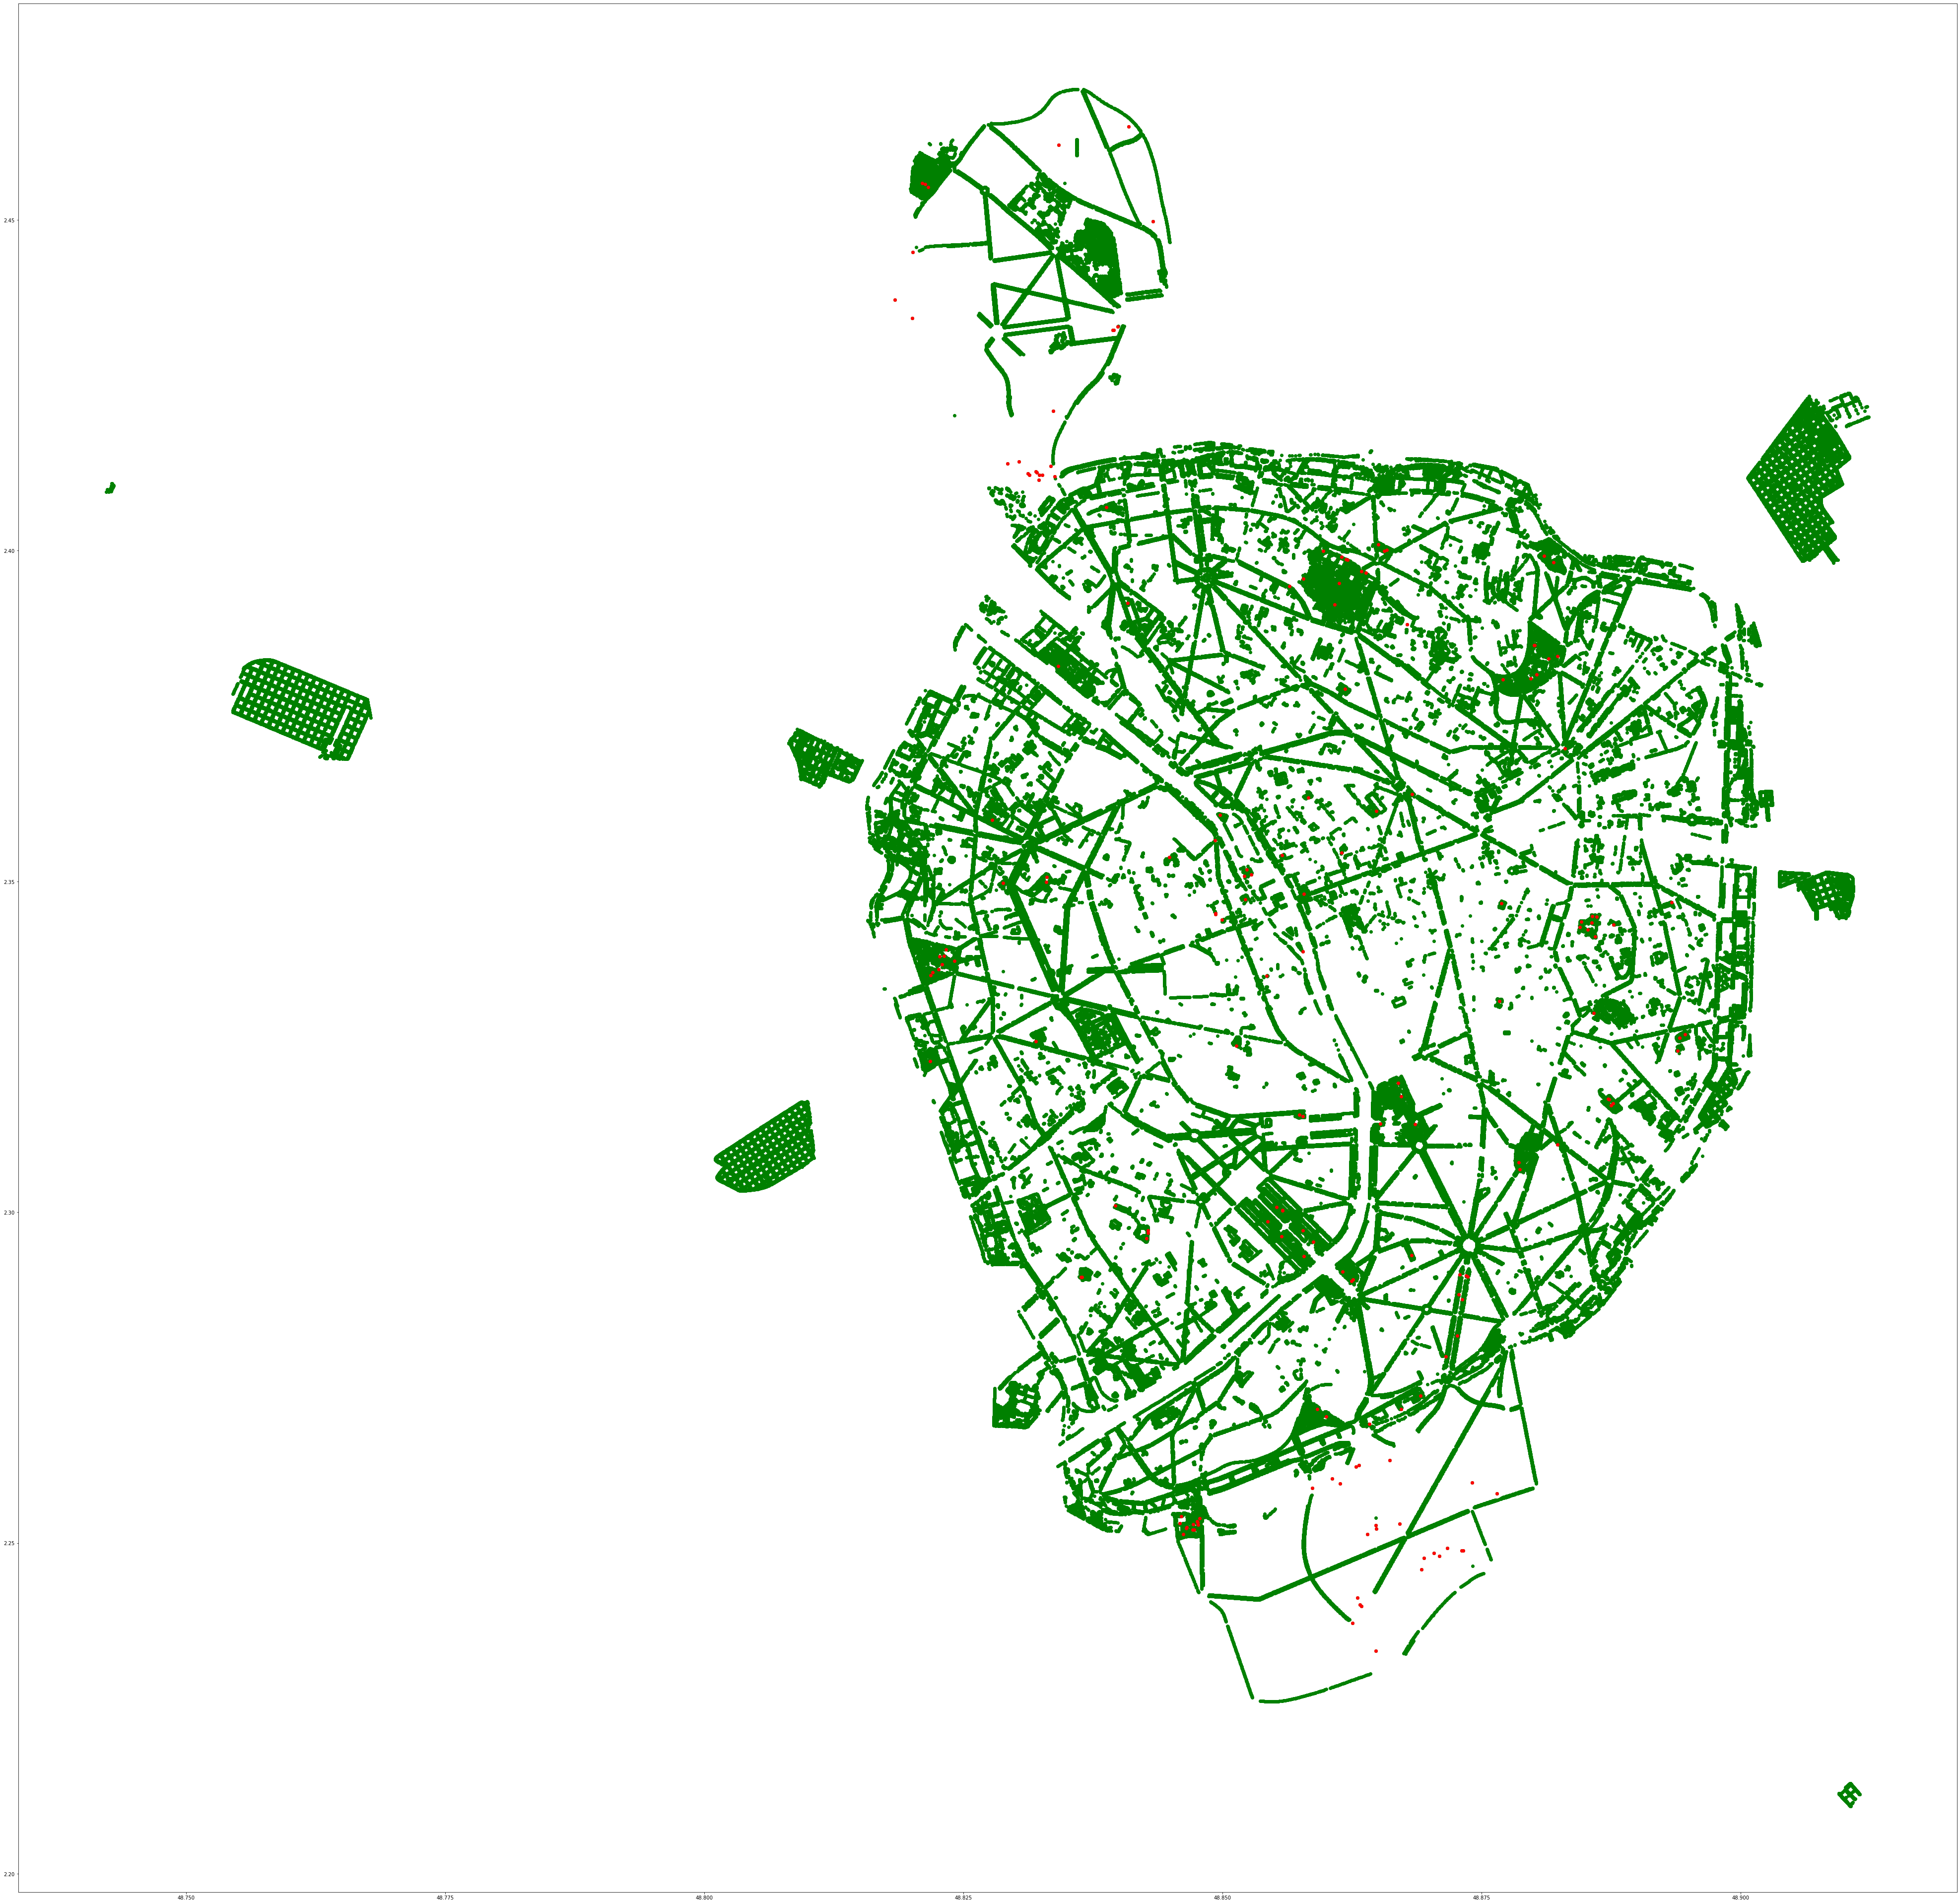

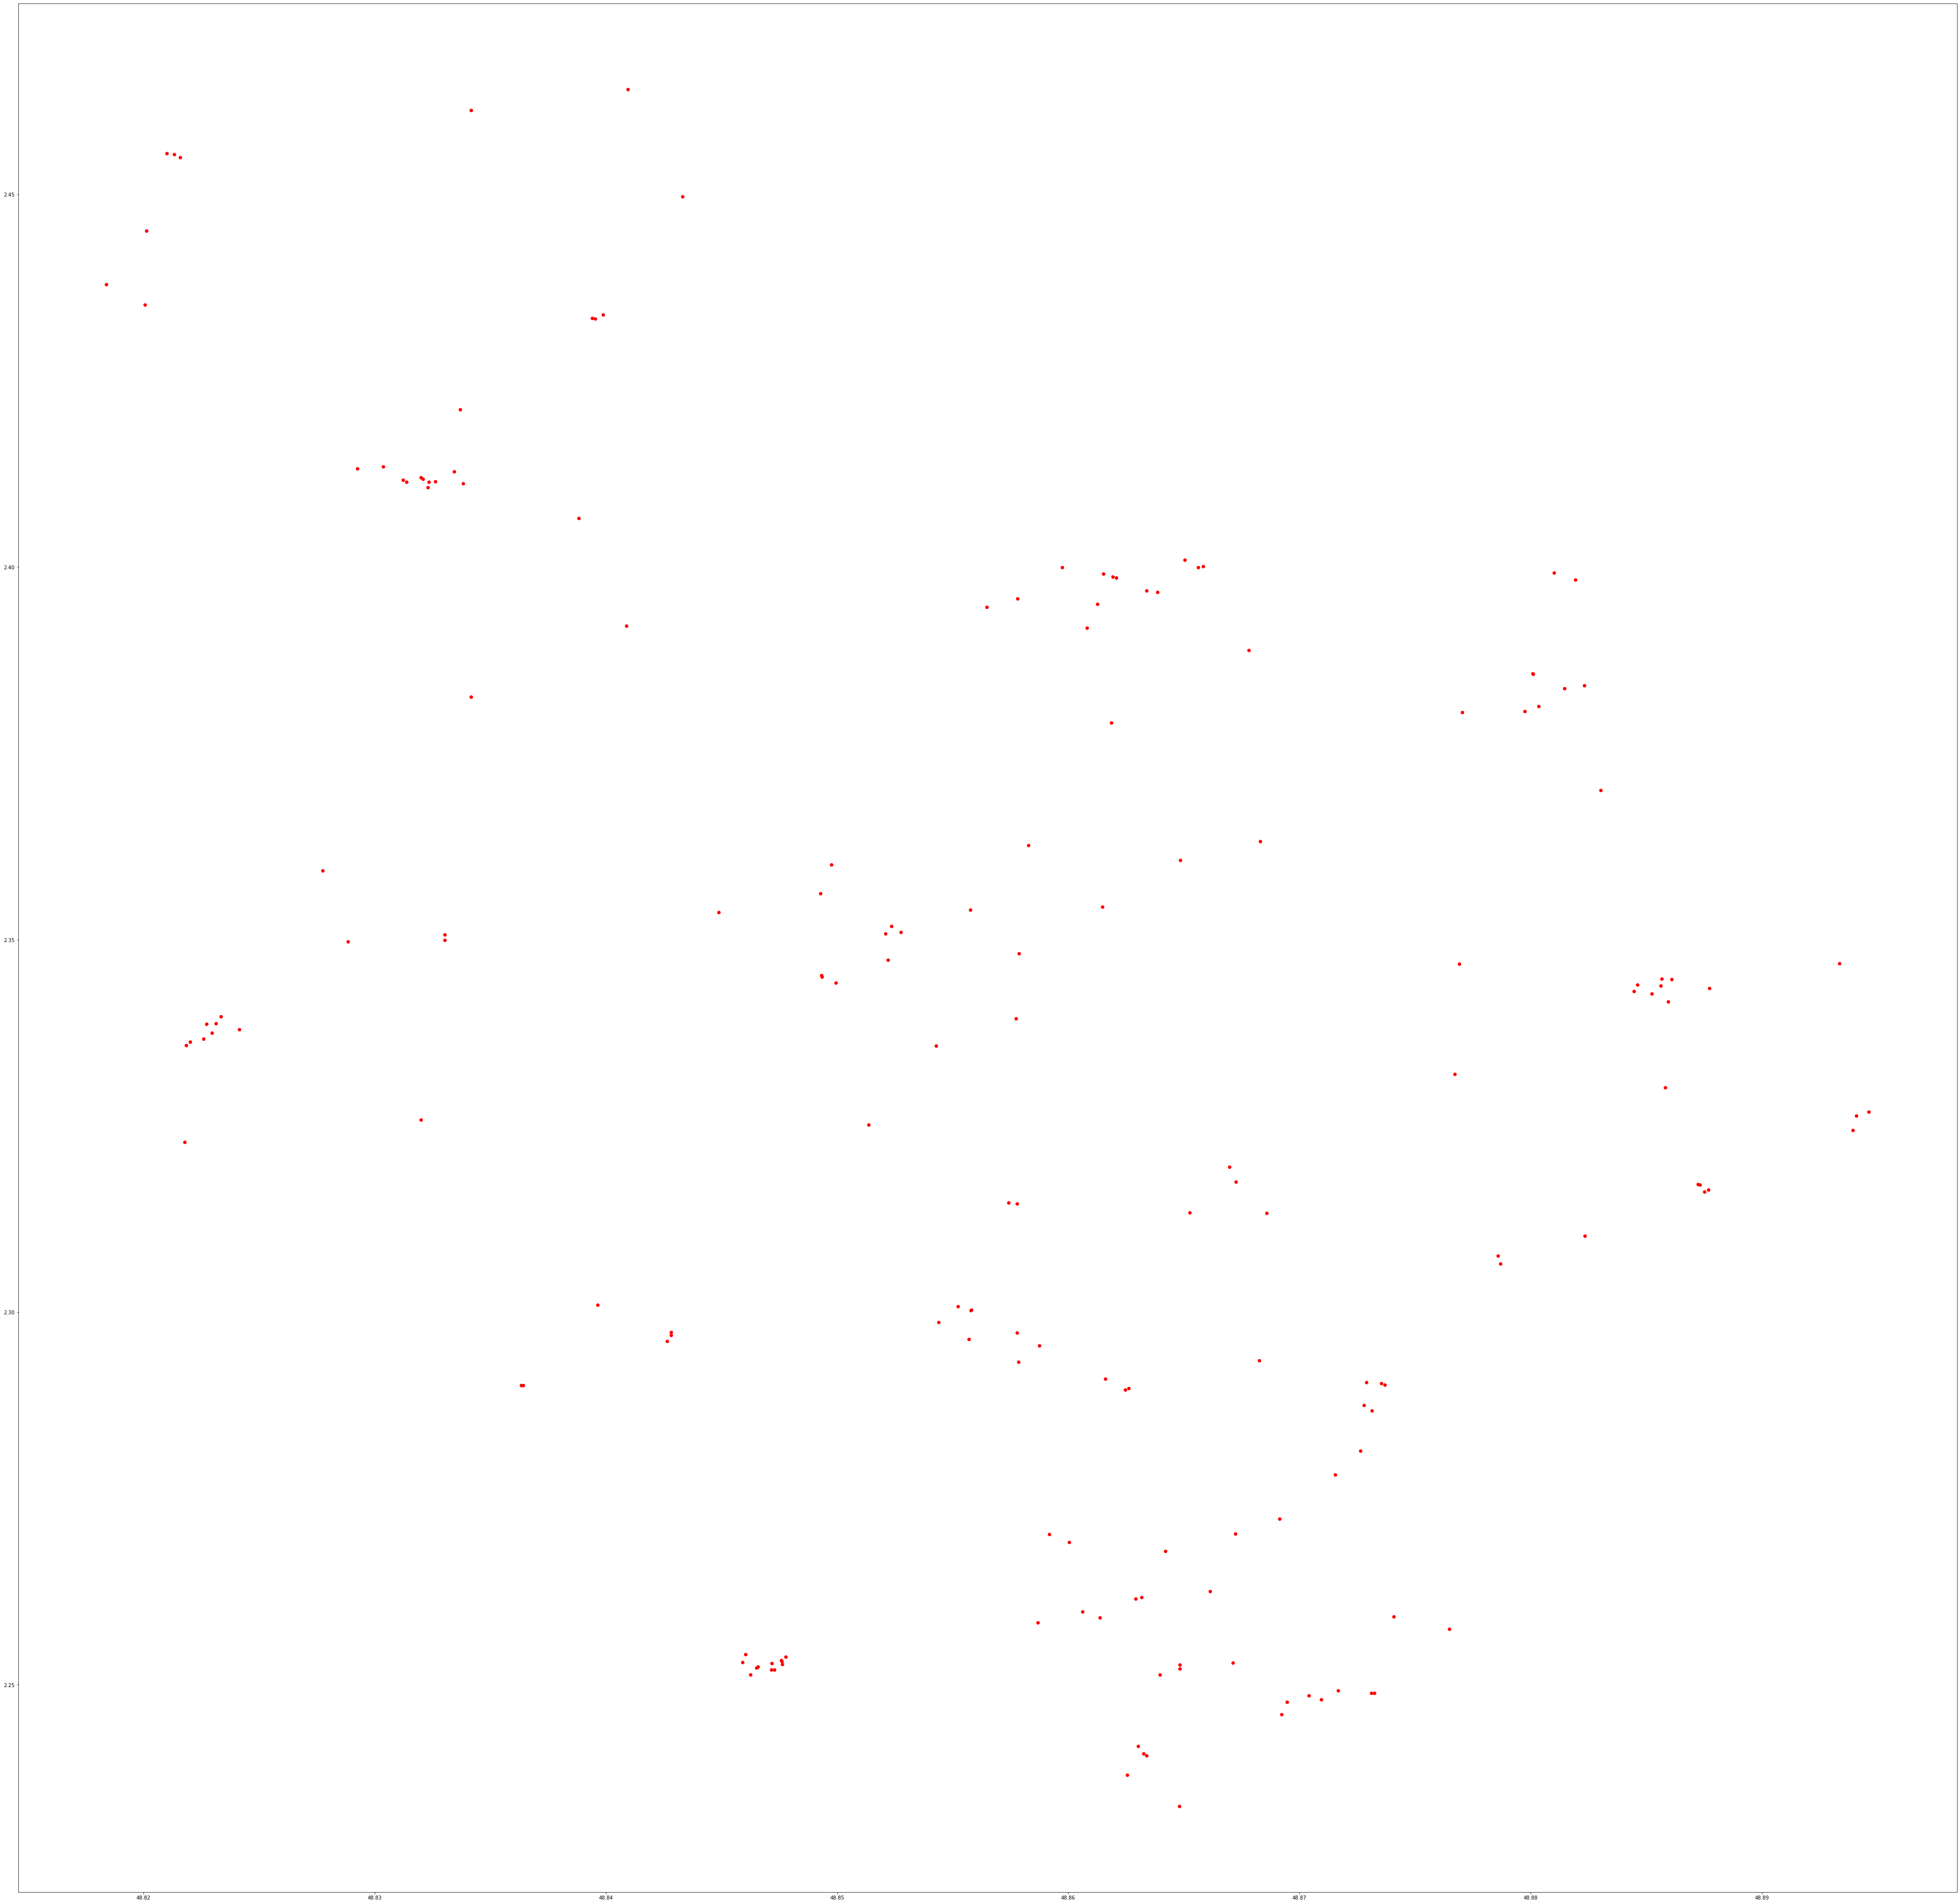

In [14]:
# plotting using plt matplotlib 

fig, ax = plt.subplots(figsize=(70, 70))
plt.plot(tree_data['lat'], tree_data['lang'], 'o', color = 'green') # size =0.001 #change the node size
plt.plot(tree_remark['lat'], tree_remark['lang'], 'o', color = 'red') # size =0.001 #change the node size
plt.show()

fig, ax = plt.subplots(figsize=(70, 70))
#plt.plot(tree_data['lat'], tree_data['lang'], 'o', color = 'green') # size =0.001 #change the node size
plt.plot(tree_remark['lat'], tree_remark['lang'], 'o', color = 'red') # size =0.001 #change the node size
plt.show()

# Data per district
Let us consider data from one district with many trees, with the biggest park. 
This may also help for simplicity of calculations. 

In [6]:
trees_arrond19 = tree_data[tree_data['ARRONDISSEMENT'] =='PARIS 19E ARRDT']
#df_id = df0[df0.bikeId == bike_ids[ind_bikeid]] 
trees_arrond19.head()

IDBASE TYPE EMPLACEMENT DOMANIALITE   ARRONDISSEMENT COMPLEMENT ADRESSE  \
8    242950            Arbre  Alignement  PARIS 19E ARRDT                NaN   
26   128077            Arbre      Jardin  PARIS 19E ARRDT                NaN   
27   139932            Arbre      Jardin  PARIS 19E ARRDT                NaN   
40  2029025            Arbre         DJS  PARIS 19E ARRDT          Lanière 1   
48  2025512            Arbre  Alignement  PARIS 19E ARRDT                NaN   

    NUMERO                                     LIEU / ADRESSE IDEMPLACEMENT  \
8      NaN                                     QUAI DE L OISE     000703013   
26     NaN                           SQUARE DE LA RUE COMPANS      00000013   
27     NaN                                 MAIL MARCEL ACHARD      00000084   
40     NaN  CENTRE SPORTIF JULES LADOUMEGUE / 35 ROUTE DES...     000302015   
48     NaN                                BOULEVARD MACDONALD     000403003   

     LIBELLE FRANCAIS     GENRE         ESPECE VARIETE OUCULTIVAR  \
8         Micocoulier    Celtis      australis                NaN   
26             Mûrier     Morus           alba    ''Macrophylla''   
27         Marronnier  Aesculus  hippocastanum      ''Baumannii''   
40  Cerisier à fleurs    Prunus    x yedoensis                NaN   
48              Chêne   Quercus         cerris                NaN   

    CIRCONFERENCE (cm)  HAUTEUR (m) STADE DE DEVELOPPEMENT REMARQUABLE  \
8                  145           20                      A         NON   
26                  59            5                    NaN         NaN   
27                  75           10                     JA         NON   
40                  20            3                      J         NON   
48                  40            5                      J         NON   

                   geo_point_2d        lat      lang  
8   48.8922227868,2.38512524892  48.892223  2.385125  
26  48.8780122434,2.39241843793  48.878012  2.392418  
27  48.8729681861,2.37732931154  48.872968  2.377329  
40  48.8935483175,2.39696503066  48.893548  2.396965  
48  48.8972817646,2.39183992523  48.897282  2.391840

C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\lyubo\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

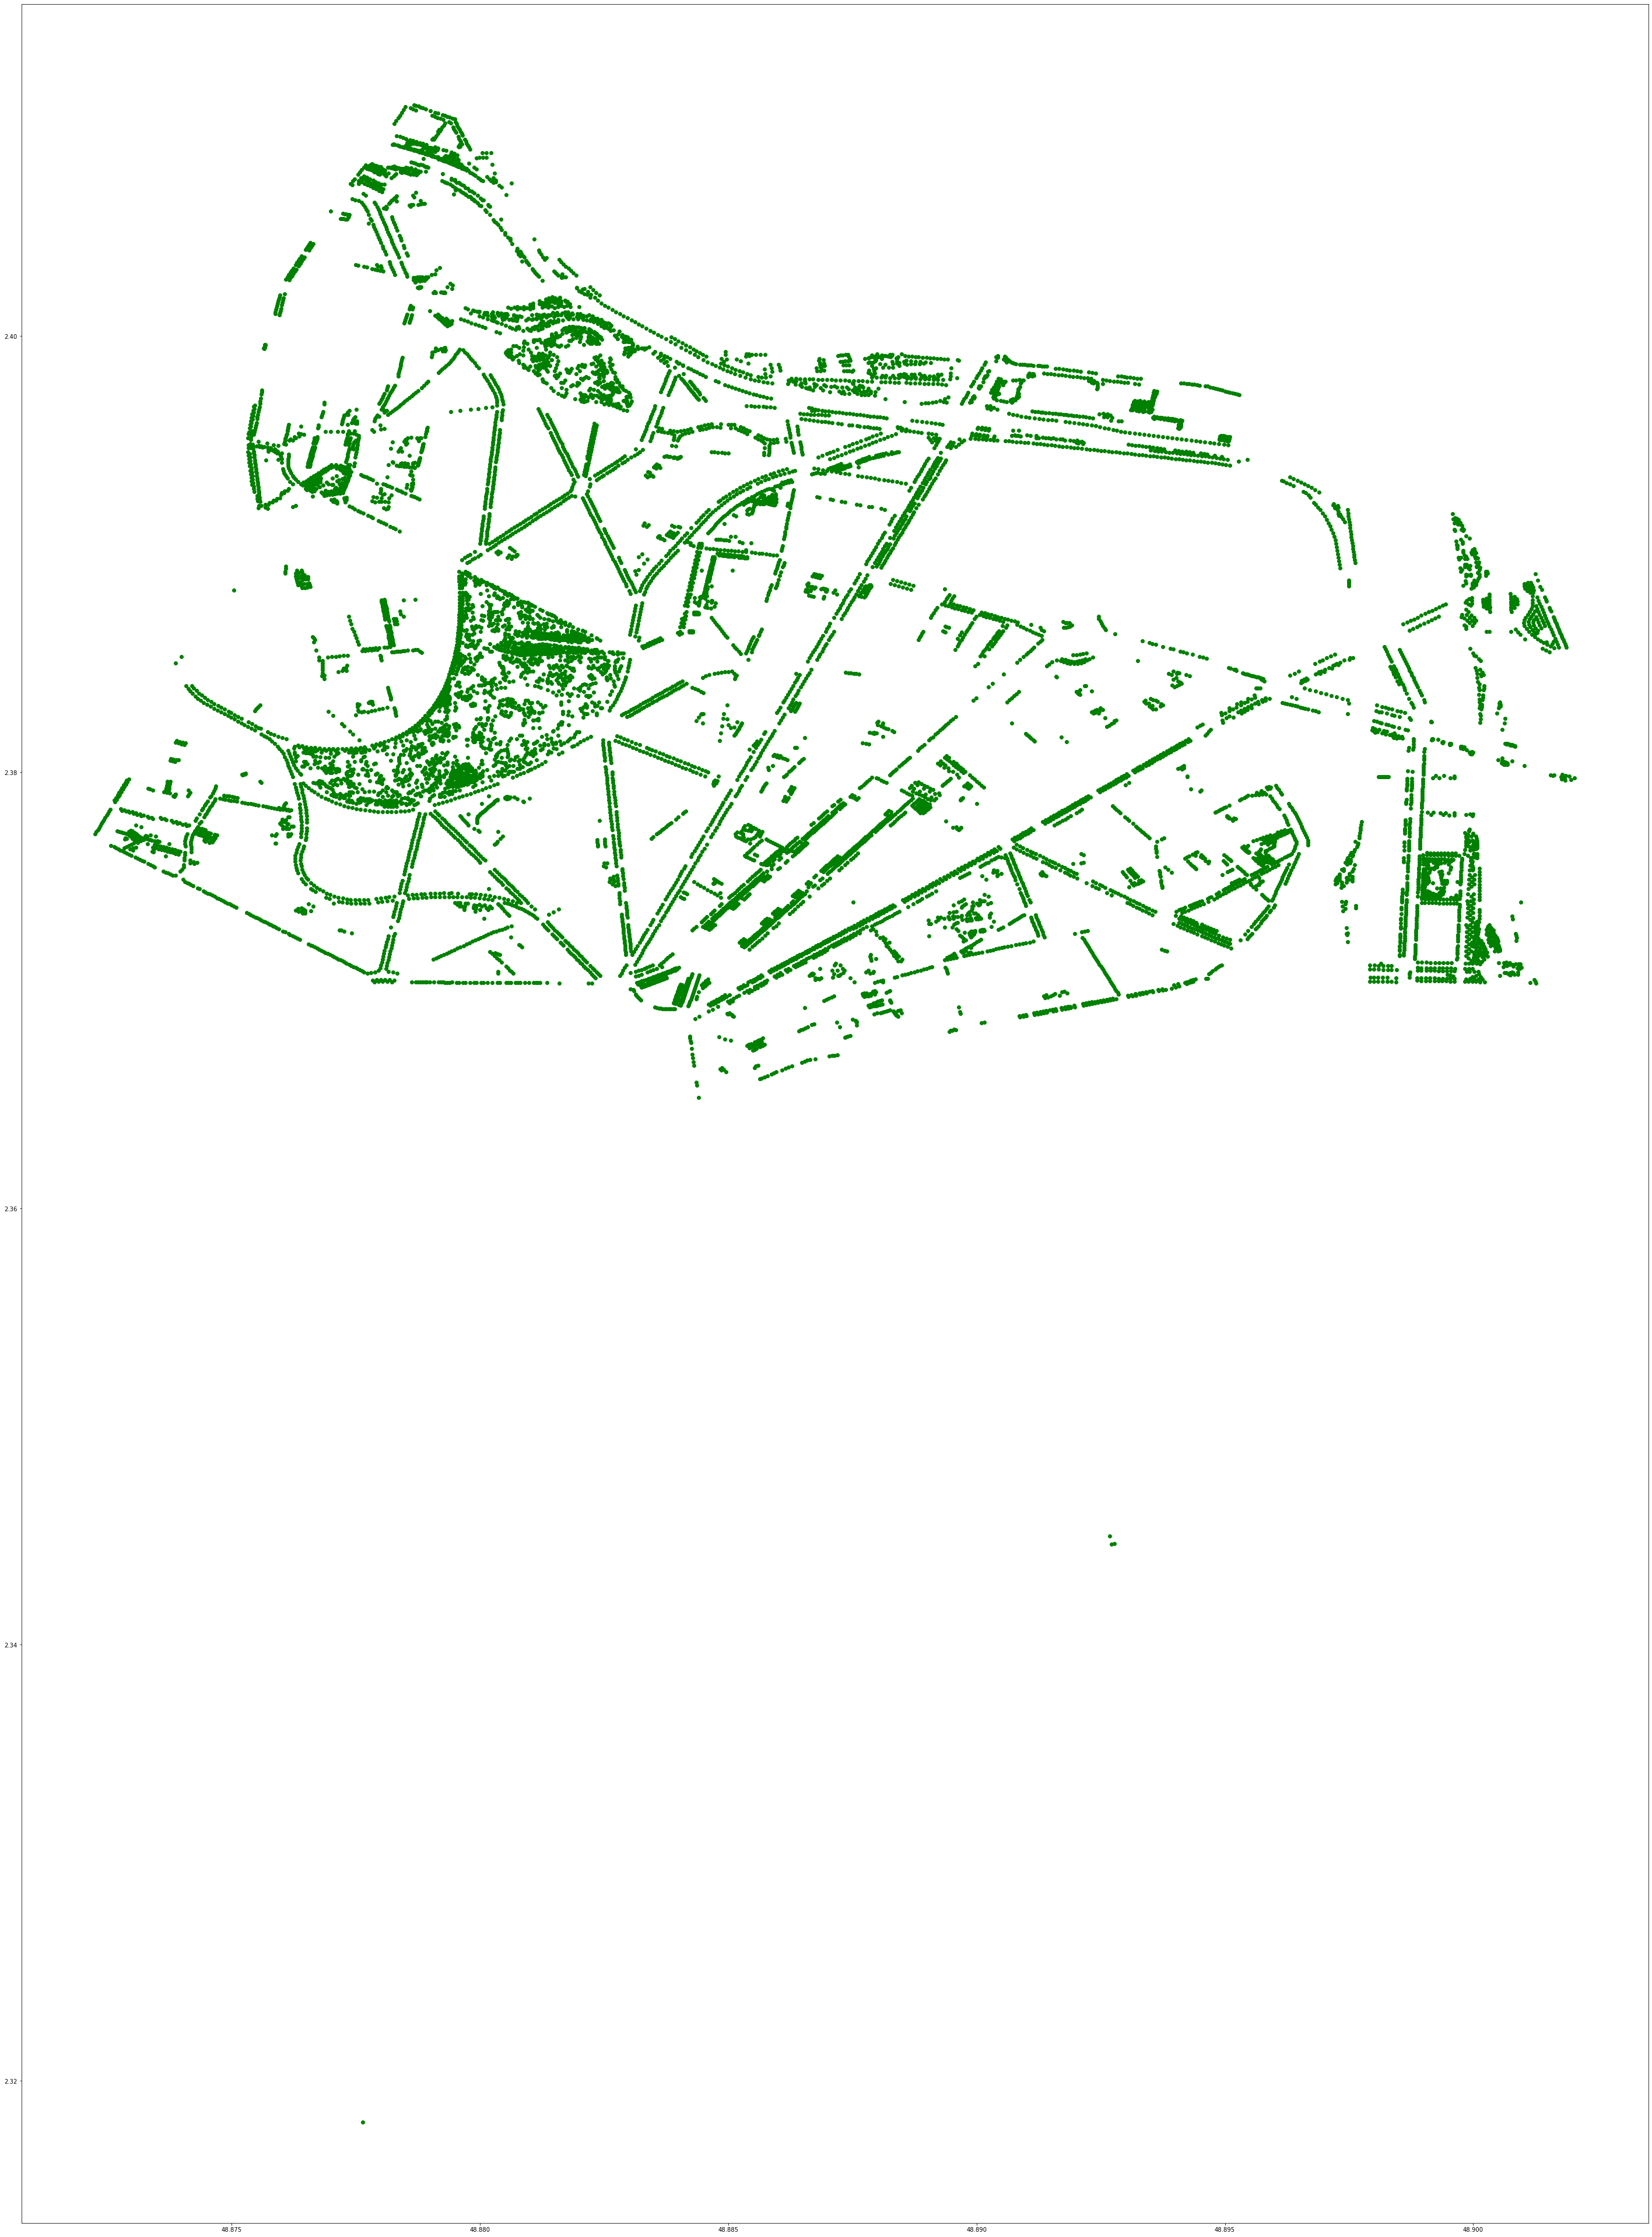

In [18]:
# Getting Lang and Lat and making additional

trees_arrond19 = df_lat_lon(trees_arrond19)

fig, ax = plt.subplots(figsize=(50, 70))
plt.plot(trees_arrond19['lat'], trees_arrond19['lang'], 'o', color = 'green') # size =0.001 #change the node size
plt.show()




# Geometric graph of trees
Let us construct geometric graphs from tree data. 
We will be using simple idea of connecting each pair of trees if the distance between them is below some fixed radius $R$. We will try several different radius $R=1, 5km$ to see the structure of trees connectivity.

First we apply this for data from one district.
Then we will apply this for the whole dataset.

# Spatial statistics 
We also calculate the distribution of distances between trees.

[[ 2.38512525 48.89222279]
 [ 2.39241844 48.87801224]
 [ 2.37732931 48.87296819]
 ...
 [ 2.37420464 48.87856862]
 [ 2.37989402 48.90179584]
 [ 2.38655185 48.90156304]]
[[0.         0.01597279 0.02077297 ... 0.01748416 0.01090913 0.00944858]
 [0.01597279 0.         0.01590988 ... 0.01822229 0.02687975 0.0242705 ]
 [0.02077297 0.01590988 0.         ... 0.00641314 0.02894152 0.03004532]
 ...
 [0.01748416 0.01822229 0.00641314 ... 0.         0.02391387 0.02609975]
 [0.01090913 0.02687975 0.02894152 ... 0.02391387 0.         0.0066619 ]
 [0.00944858 0.0242705  0.03004532 ... 0.02609975 0.0066619  0.        ]]


Text(0, 0.5, 'frequence')

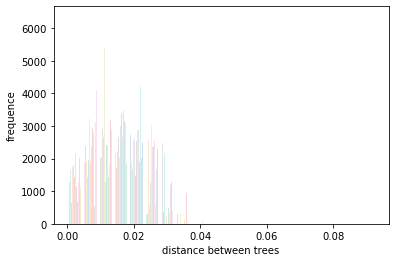

In [19]:
import numpy as np
from scipy.spatial import distance # we will use built-in function for calculation of distances
import time

x1_coords = trees_arrond19['lang']
y1_coords = trees_arrond19['lat']

#coords = np.array((x1_coords, y1_coords))
coords = np.array(list(zip(x1_coords, y1_coords)))

start = time.time()
#coords = [(35.0456, -85.2672),(35.1174, -89.9711),    (35.9728, -83.9422),    (36.1667, -86.7833)]
dist  = distance.cdist(coords, coords, 'euclidean') # in the form of the matrix 


# plotting all distance distribution 
plt.hist(dist, bins=20, alpha=0.2) # alpha is transparency parameter    # now we are plotting the histogram 
plt.xlabel('distance between trees')
plt.ylabel('frequence')

time_spent = time.time() - start 


In [ ]:

import networkx as nx
import matplotlib.pyplot as plt


dmin =5 # minimum radius between two trees
#ncenter =0 # position of central node in graph
G = nx.Graph()# form geometric graph from trees

# non optimal distance calculation 
G.add_nodes_from(trees_arrond19['GENRE'].values)
size = np.size(trees_arrond19['geo_point_2d'].values)
print('number of trees', size)


edges = []
pos = []
for n in range(0,size): # loop through all rows 
    for k in range(0, size):
        #x1 = trees_arrond19['lang'].iloc[n]
        #y1 = trees_arrond19['lat'].iloc[n]#pos[n]
        if dist[k,n]<dmin: # if two trees are close to each other draw a link between them
            print(d)
            edges.append(tuple((n, k))) 
            #G.add_edges_from(tuple((n,k)))
print('done with adding edges to graph')

G.add_edges_from(edges)
#print(G.edges)
nx.draw(G,  node_size=1)
#nx.draw(G)
#nx.draw_networkx_edges(G, pos, alpha = 0.4)
#nx.draw_networkx_nodes(G, pos, node_size = 80, cmap = plt.get_cmap('Reds_r'))




In [ ]:

#file to download or to use from openstreetmaps
shapefile = gpd.read_file("arrondissements/arrondissements.shp")

fig, ax = plt.subplots(figsize = (20,16))
shapefile.plot(ax=ax,color='white',)
gdf.plot(ax=ax, color='green',markersize=0.1)
plt.show()




Let us make additional calculation of area per district... 

In [ ]:
## Calculating Area of every district
paris = shapefile.copy()
paris= paris.to_crs({'init': 'epsg:3857'})
print(paris.crs)
paris.head(2)
paris["area"] = paris['geometry'].area/ 10**3
paris= paris.to_crs({'init': 'epsg:32633'})
paris["area"] = paris['geometry'].area/ 10**3

In [ ]:
to_map_main = paris[['c_ar','area']]

In [ ]:
District_Tree_count_to_map = tree_data['ARRONDISSEMENT'].value_counts().reset_index().rename(columns={'index':'ARRONDISSEMEN','ARRONDISSEMENT':'Count'})

In [ ]:
map_district_number = {'PARIS 1ER ARRDT':1,
                      'PARIS 2E ARRDT':2,
                      'PARIS 3E ARRDT':3,
                      'PARIS 4E ARRDT':4,
                      'PARIS 5E ARRDT':5,
                      'PARIS 6E ARRDT':6,
                      'PARIS 7E ARRDT':7,
                      'PARIS 8E ARRDT':8,
                      'PARIS 9E ARRDT':9,
                      'PARIS 10E ARRDT':10,
                      'PARIS 11E ARRDT':11,
                      'PARIS 12E ARRDT':12,
                      'PARIS 13E ARRDT':13,
                      'PARIS 14E ARRDT':14,
                      'PARIS 15E ARRDT':15,
                      'PARIS 16E ARRDT':16,
                      'PARIS 17E ARRDT':17,
                      'PARIS 18E ARRDT':18,
                      'PARIS 19E ARRDT':19,
                      'PARIS 20E ARRDT':20,
                      }

In [ ]:
District_Tree_count_to_map['c_ar'] = District_Tree_count_to_map['ARRONDISSEMEN'].map(map_district_number)

In [ ]:
District_Tree_count_to_map = District_Tree_count_to_map.dropna()

In [ ]:
District_Tree_count_to_map = District_Tree_count_to_map.merge(to_map_main, how='left',on='c_ar')

In [ ]:
District_Tree_count_to_map['Coverage'] = District_Tree_count_to_map['Count']/District_Tree_count_to_map['area']

In [ ]:
District_Tree_count_to_map['Coverage_from_100'] = District_Tree_count_to_map['Coverage']-District_Tree_count_to_map['Coverage'].min()
District_Tree_count_to_map['Coverage_from_100'] = (District_Tree_count_to_map['Coverage_from_100']/District_Tree_count_to_map['Coverage_from_100'].max())*100
District_Tree_count_to_map

In [ ]:
paris_with_coverage = paris.merge(District_Tree_count_to_map[['Coverage','ARRONDISSEMEN','c_ar','Coverage_from_100']], how = 'left',on='c_ar')

In [ ]:
paris_with_coverage['coords'] = paris_with_coverage['geometry'].apply(lambda x: x.representative_point().coords[:])
paris_with_coverage['coords'] = [coords[0] for coords in paris_with_coverage['coords']]

In [ ]:
paris_with_coverage['ARRONDISSEMEN'] = paris_with_coverage['ARRONDISSEMEN'].apply(lambda x:x.replace('PARIS',''))

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize = (20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
paris_with_coverage.plot(ax=ax,column='Coverage_from_100',legend=True,cax=cax,cmap='Greens')
paris_with_coverage.apply(lambda x: ax.annotate(s=x.ARRONDISSEMEN, xy=x.geometry.centroid.coords[0], ha='center'),axis=1);


# Road street , Tree Distribuation

In [ ]:
shapefile_roads = gpd.read_file("france-roads-shape/roads.shp")

<AxesSubplot:>

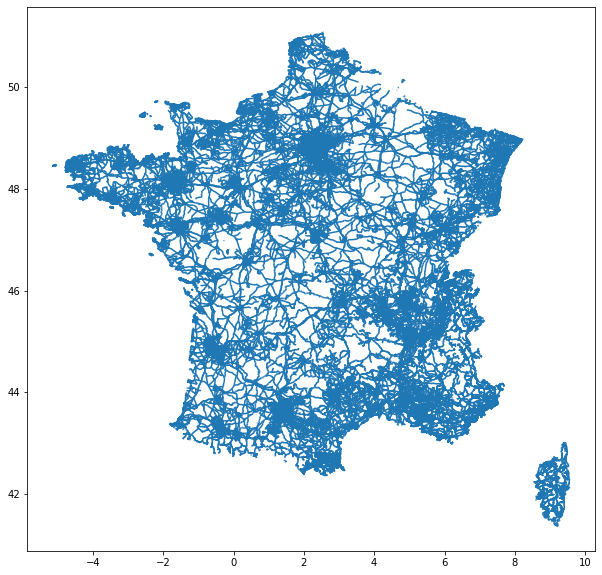

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
shapefile_roads.plot(ax=ax)

In [ ]:
# extract Paris roads
pointInPolys = sjoin(shapefile_roads, shapefile)
pointInPolys.head()

osm_id                 name   ref          type  oneway  maxspeed  \
0       2569        Rue Nationale  None      tertiary       1         0   
1       2570  Avenue des Gobelins  None     secondary       0         0   
2       2573      Place des Alpes  None  unclassified       0         0   
94   1345035            Rue Fagon  None  unclassified       0        30   
200  1881495           Rue Sthrau  None  unclassified       0         0   

                                              geometry  index_right  \
0    LINESTRING (2.36947 48.82161, 2.36868 48.82290...            9   
1    LINESTRING (2.35537 48.83182, 2.35506 48.83219...            9   
2    LINESTRING (2.35858 48.83214, 2.35841 48.83217...            9   
94     LINESTRING (2.35653 48.83278, 2.35841 48.83217)            9   
200  LINESTRING (2.36578 48.82818, 2.36673 48.82791...            9   

         n_sq_ar  c_ar  c_arinsee         l_ar   l_aroff      n_sq_co  \
0    750000013.0  13.0    75113.0  13Ã¨me Ardt  Gobelins  750001537.0   
1    750000013.0  13.0    75113.0  13Ã¨me Ardt  Gobelins  750001537.0   
2    750000013.0  13.0    75113.0  13Ã¨me Ardt  Gobelins  750001537.0   
94   750000013.0  13.0    75113.0  13Ã¨me Ardt  Gobelins  750001537.0   
200  750000013.0  13.0    75113.0  13Ã¨me Ardt  Gobelins  750001537.0   

          surface     perimetre  
0    7.149311e+06  11546.546526  
1    7.149311e+06  11546.546526  
2    7.149311e+06  11546.546526  
94   7.149311e+06  11546.546526  
200  7.149311e+06  11546.546526

In [ ]:
list_street_to_keep = ['residential','footway','secondary','unclassified','primary']


<AxesSubplot:>

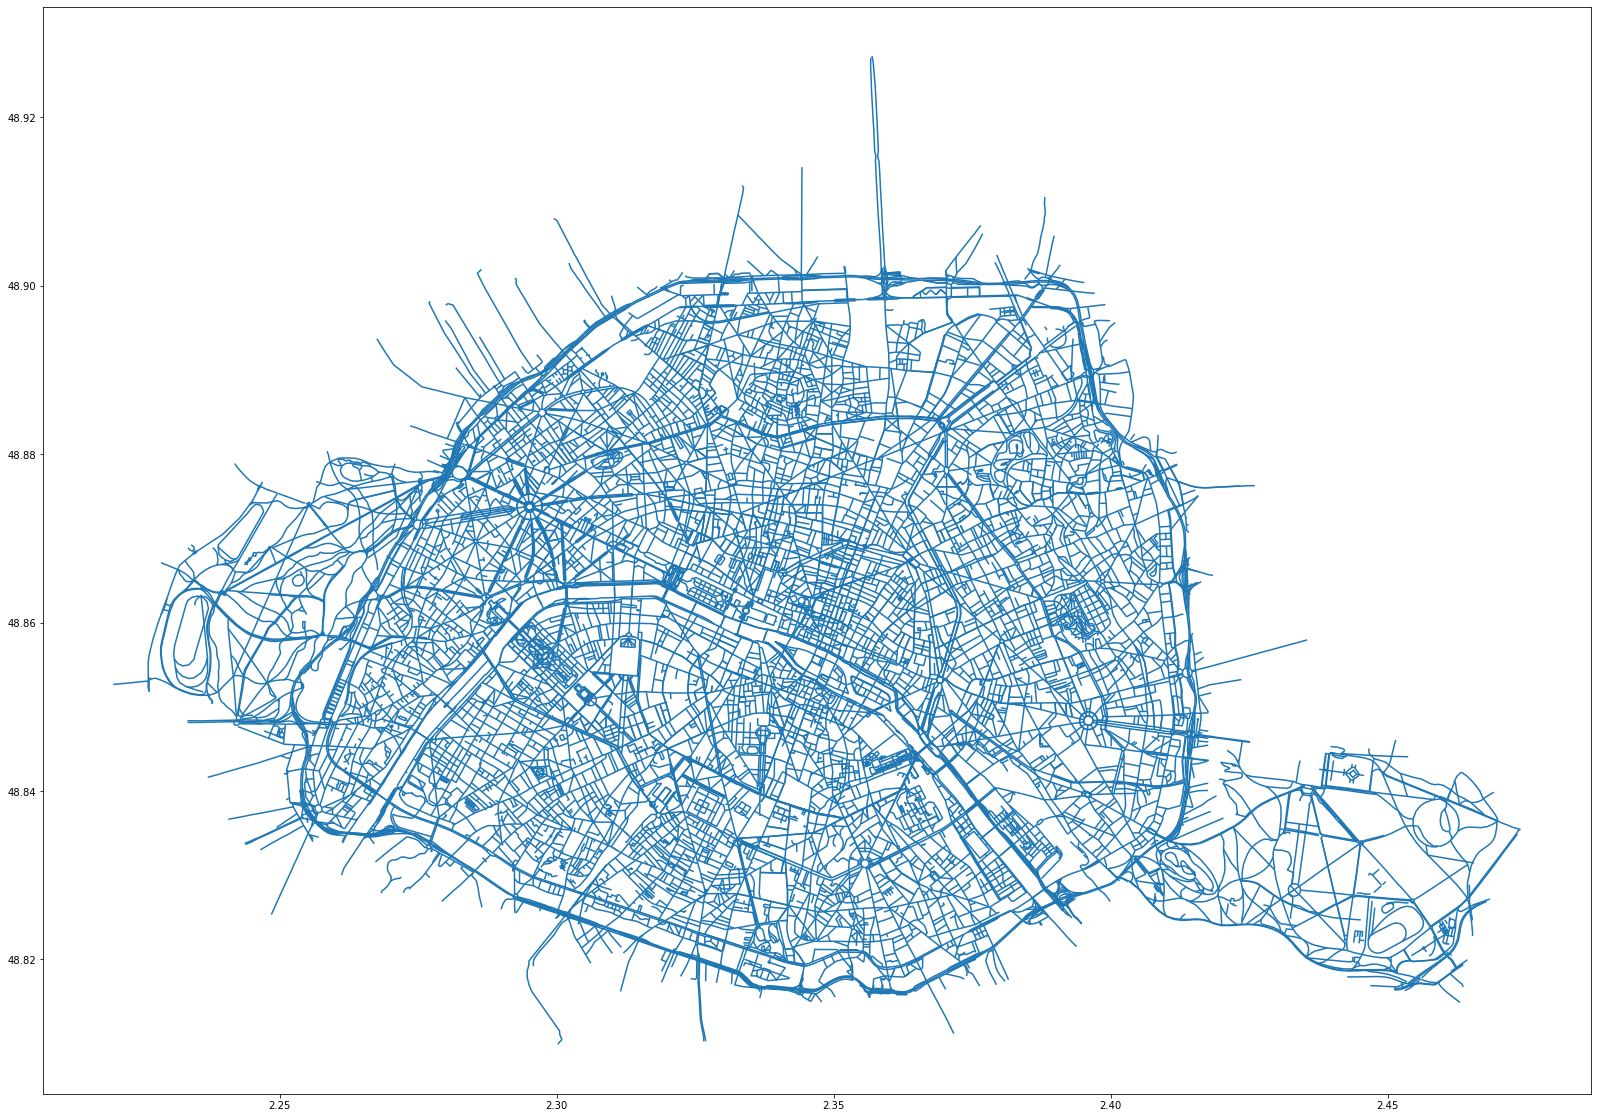

In [ ]:
fig, ax = plt.subplots(figsize = (30,20))

pointInPolys.plot(ax=ax, )

<AxesSubplot:>

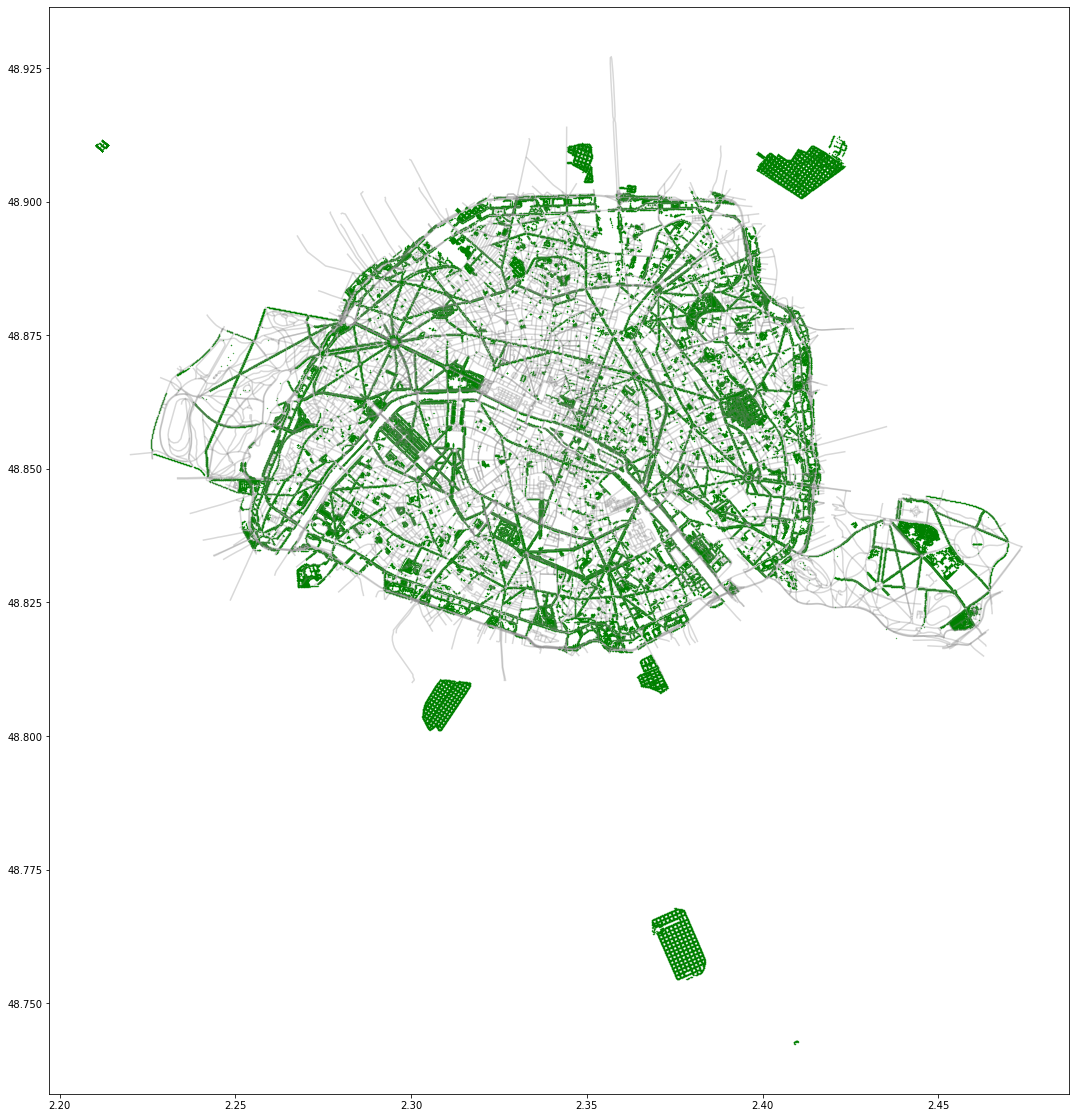

In [ ]:
fig, ax = plt.subplots(figsize = (30,20))

gdf.plot(ax=ax, color='green',markersize=0.1)
pointInPolys.plot(ax=ax, color = 'grey', alpha=0.3)

# Network for type of trees

In [ ]:
tree_data_part = tree_data[0:10000]

In [ ]:

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""
    tree = BallTree(candidates, leaf_size=15, metric='haversine')
    distances, indices = tree.query(src_points, k=k_neighbors)
    distances = distances.transpose()
    indices = indices.transpose()
    closest = indices[0]
    closest_dist = distances[0]
    return (closest, closest_dist)


def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    right = right_gdf.copy().reset_index(drop=True)
    left_radians = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    right_radians = np.array(right[right_geom_col].apply(lambda geom: (geom.x * np.pi / 180, geom.y * np.pi / 180)).to_list())
    closest, dist = get_nearest(src_points=left_radians, candidates=right_radians)
    closest_points = right.loc[closest]
    closest_points = closest_points.reset_index(drop=True)
    if return_dist:
        earth_radius = 6371000  # meters
        closest_points['distance'] = dist * earth_radius
    return closest

In [ ]:
# Don't run this cell it will take time
combinations_g=[]
combinations_s=[]
counter =0
for i in range(0,tree_data_part.shape[0]):
    part_data = tree_data.drop([i])
    closest = nearest_neighbor(tree_data_part.iloc[i:i+1], part_data, return_dist=False)
    combinations_g.append([part_data.iloc[closest]['LIBELLE FRANCAIS'],tree_data_part.iloc[i:i+1]['LIBELLE FRANCAIS']])
    combinations_s.append([part_data.iloc[closest]['ESPECE'],tree_data_part.iloc[i:i+1]['ESPECE']])
    counter = counter+1
    if (counter%100==0):
        print(counter)

In [ ]:
combinations_g_3 = []
for i in range(0,len(combinations_g)):
    x= combinations_g[i][0].values[0]
    y = combinations_g[i][1].values[0]
    combinations_g_3.append([x,y])

In [ ]:
for h in combinations_g_3:
            
    if len(h)>1:
                
        s=h[0]
        for t in h[1:]:
            if (s,t) in Eg:
                Eg[(s,t)]+=1
            else:
                Eg[(s,t)]=1

In [ ]:
F = open('trees_net_data.csv', 'w') 

F.write('Source,Target,Weight\n')
for e in Eg:
    F.write('%s,%s,%0.2f\n'%(e[0],e[1],Eg[e]))

F.close()

## Genre Tree Network

<img src="Tree_network_ppt.png" alt="Drawing" style="width: 800px;"/>



### Watering use case (not complete)

In [ ]:
# C= pi*d
# d= C/pi
#The rule of thumb for established trees is 10 gallons of water for each inch of the tree's diameter. 
#You can use a ruler at knee height to measure or just use your best guess.


In [ ]:
tree_data['diameter'] =  tree_data['CIRCONFERENCE (cm)'] /math.pi
tree_data['diameter'] = tree_data['diameter']/2.54
tree_data['Water_need_Lit'] = tree_data['diameter']*10*3.78541
tree_data['Current_water_status'] = np.random.randint(0, 100, tree_data.shape[0])

In [ ]:
paris['diss'] = 1
full_paris = paris.dissolve(by='diss')

In [ ]:
paris_2= gpd.GeoDataFrame(paris,crs={'init' :'epsg:4901'})
paris_2 = paris_2.to_crs(epsg=3763)

/Users/danaalmanla/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

<ipython-input-43-ac4a67ea107f>:1: FutureWarning:

CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.



In [ ]:
full_paris = gpd.GeoDataFrame(full_paris,
                                     crs={'init' :'epsg:4326'})
full_paris = full_paris.to_crs(epsg=3763)

<ipython-input-44-974c8e2c270d>:1: FutureWarning:

CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.



In [ ]:
from shapely.geometry import Point
def random_point_in_shp(shp):
    within = False
    while not within:
        x = np.random.uniform(shp.bounds[0], shp.bounds[2])
        y = np.random.uniform(shp.bounds[1], shp.bounds[3])
        within = shp.contains(Point(x, y))
    return Point(x,y)

<AxesSubplot:>

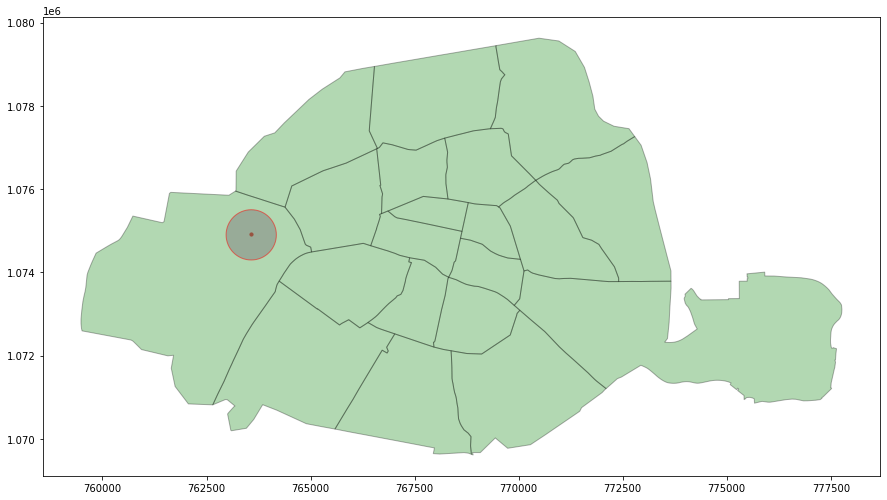

In [ ]:
current_location = full_paris['geometry'].apply(random_point_in_shp)
walking_dist = np.random.randint(0,1000)
fig, ax = plt.subplots(figsize = (15,10))

current_location.plot(ax=ax, color='red',markersize=10)
paris_2.plot(ax=ax, color = 'green', alpha=0.3,edgecolor='k')
current_location.geometry.buffer(walking_dist).plot(ax=ax, color = 'grey', alpha=0.5,edgecolor='red')

